In [1]:
import scipy.io.wavfile as wavfile
import scipy
import math
import scipy.fftpack as fftpk
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft
from scipy.signal import find_peaks

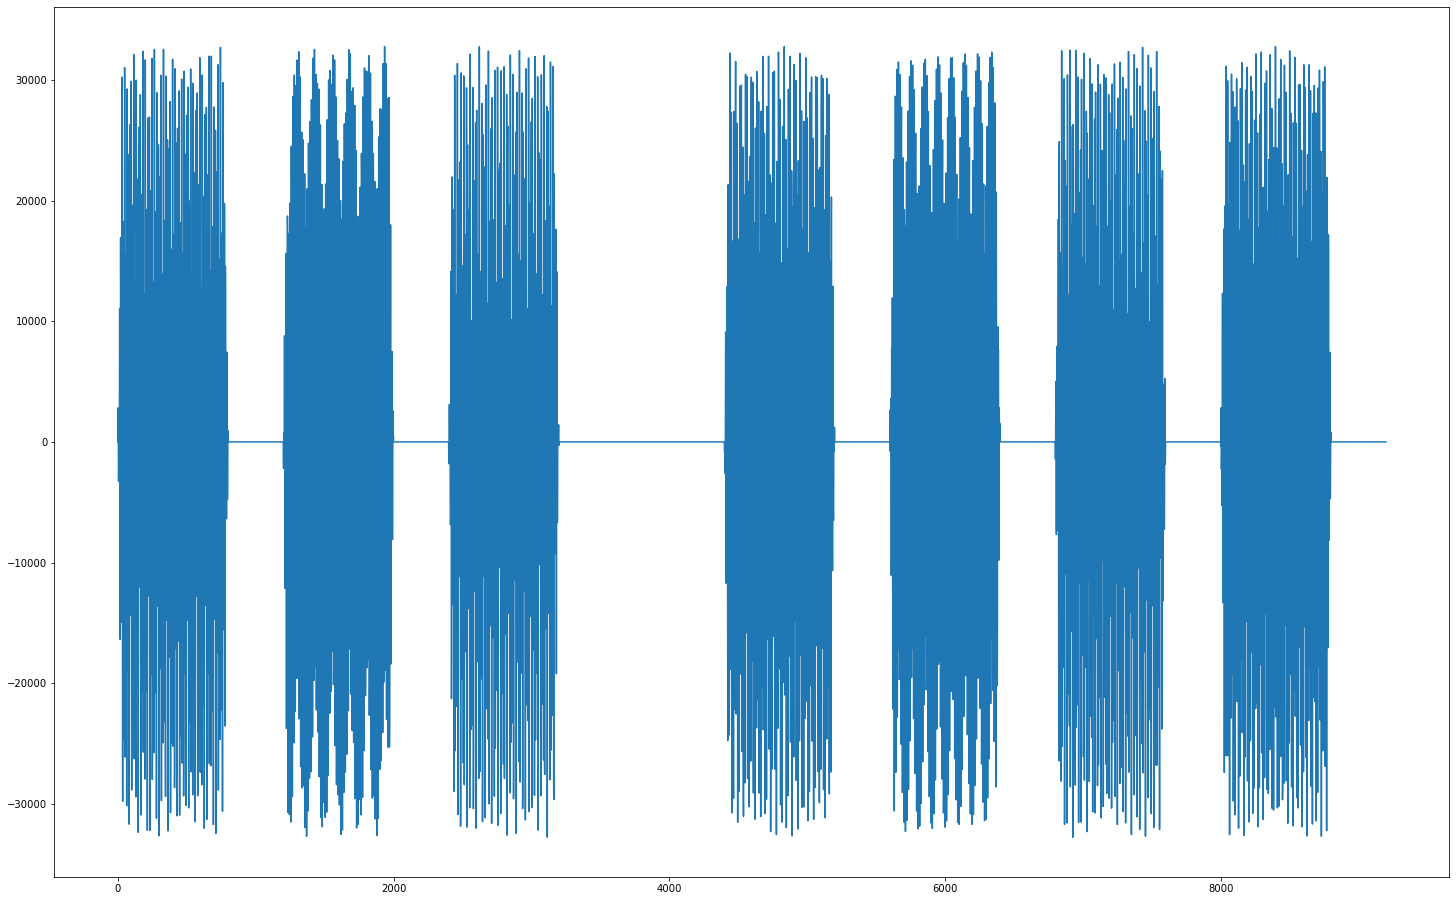

In [2]:
s_rate, signal = wavfile.read("C:/Users/Zeynep/Desktop/BilMÜH/Signals&Systems/DTMF/tel.wav")
plt.figure(figsize = (25, 16))
plt.plot(signal)

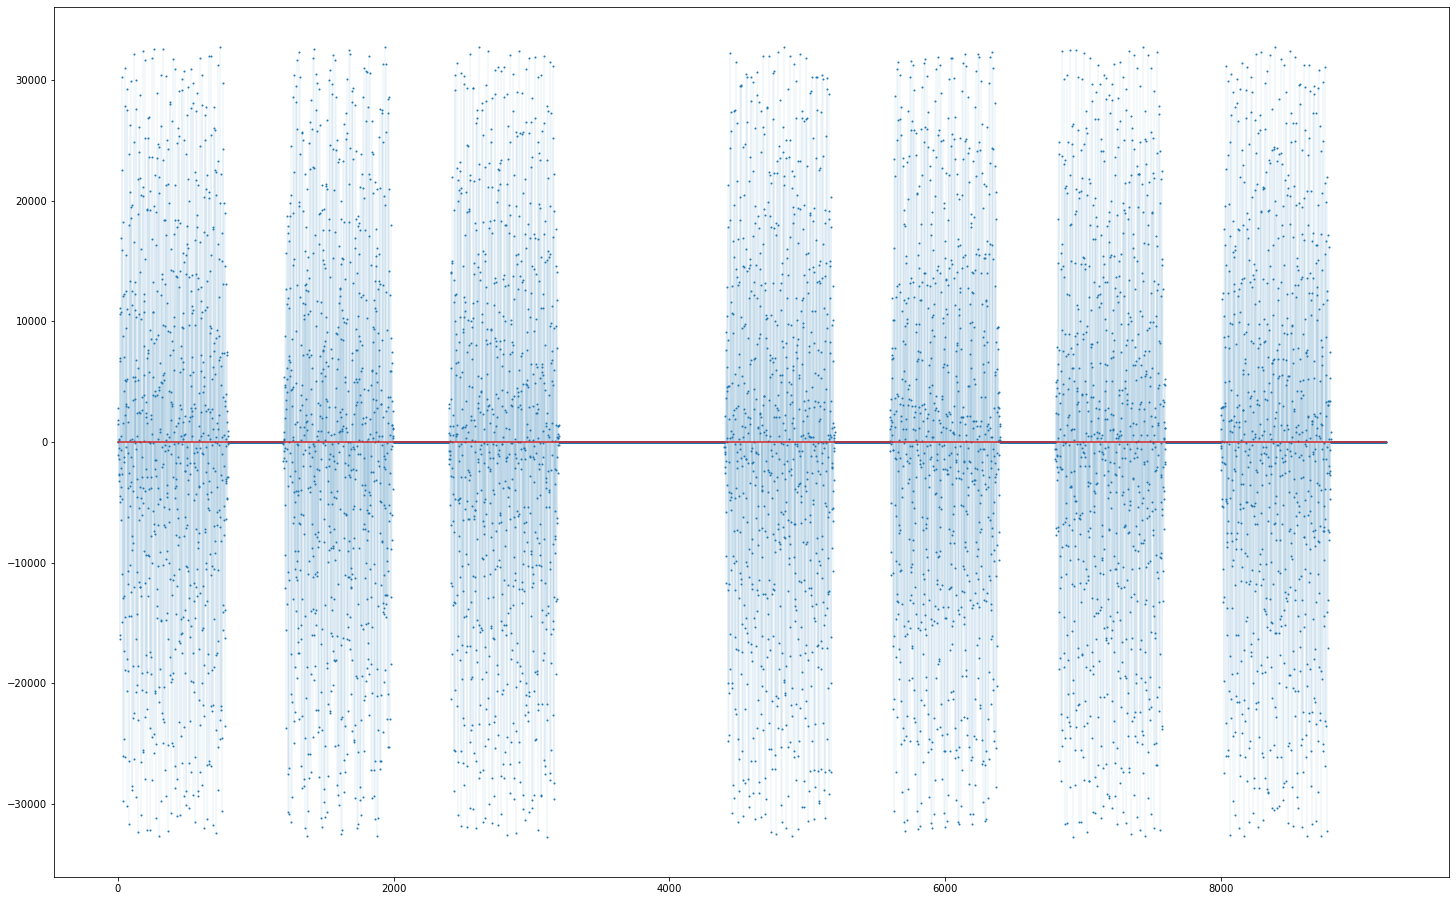

In [3]:
plt.figure(figsize = (25, 16))
markerline, stemlines, baseline = plt.stem(signal)
plt.setp(stemlines, 'linewidth', 0.1)
plt.setp(markerline,  markersize = 1)
plt.show()

In [4]:
d = math.floor(len(signal) / 7)
print(d)

1314


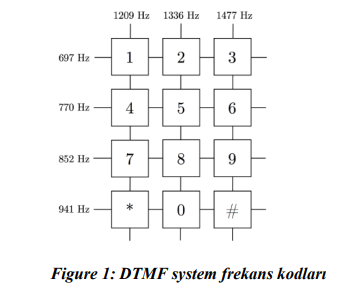

In [5]:
def get_number_fromPeaks(peaks):
    if 697 in peaks:
        if 1209 in peaks:
            return '1'
        elif 1336 in peaks:
            return '2'
        elif 1477 in peaks:
            return '3'
        
    elif 770 in peaks:
        if 1209 in peaks:
            return '4'
        elif 1336 in peaks:
            return '5'
        elif 1477 in peaks:
            return '6'
        
    elif 852 in peaks:
        if 1209 in peaks:
            return '7'
        elif 1336 in peaks:
            return '8'
        elif 1477 in peaks:
            return '9'
    
    elif 941 in peaks:
        if 1209 in peaks:
            return '*'
        elif 1336 in peaks:
            return '0'
        elif 1477 in peaks:
            return '#'

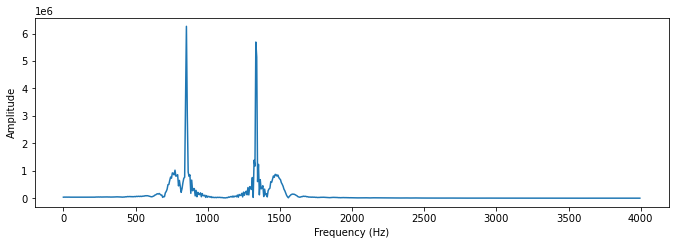

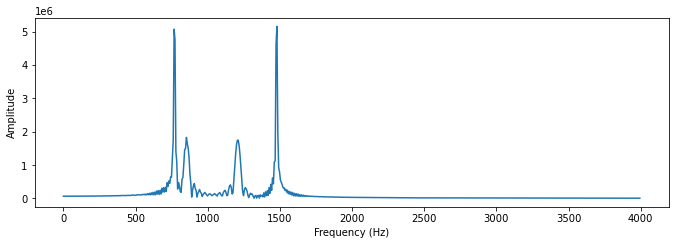

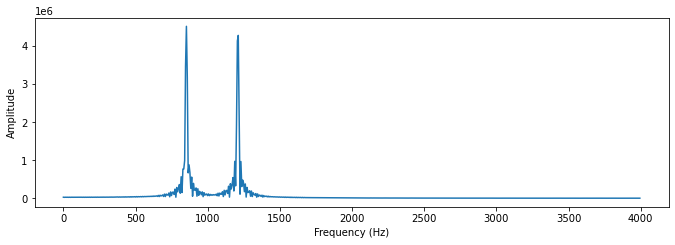

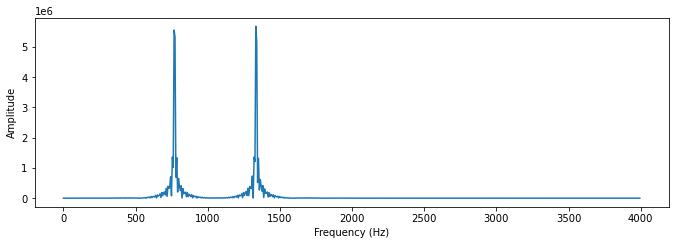

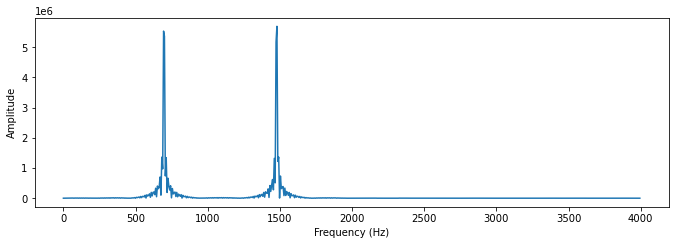

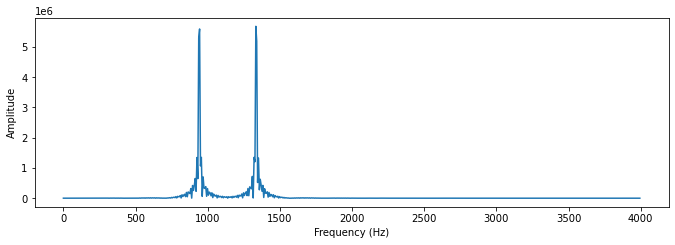

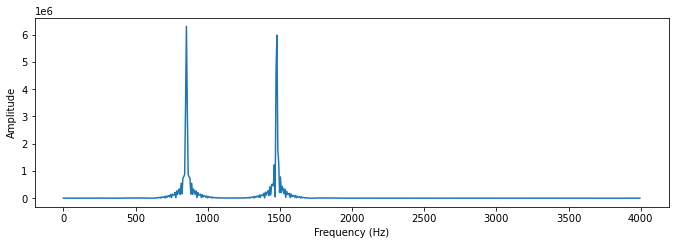

In [6]:
for i in range(0,7):
    subsignal = signal[i * d : (i + 1) * d]
    FFT = abs(fft(subsignal))
    freqs = fftpk.fftfreq(len(FFT), (1.0/s_rate))
    
    plt.figure(figsize =(25,16))
    plt.subplot(4, 2, i + 1)
    plt.plot(freqs[range(len(FFT)//2)], FFT[range(len(FFT)//2)])                                                          
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')

In [7]:
peak_amps = [697, 770, 852, 941, 1209, 1336, 1477]
number = []
print('Peaks')
for i in range(0,7):
    subsignal = signal[i * d : (i + 1) * d]
    l = len(subsignal)
    subsignal = subsignal[l // 3 : 2 * l // 2]
    FFT = abs(fft(subsignal))
    freqs = fftpk.fftfreq(len(FFT), (1.0/s_rate))
    #gurultuler dolayisiyla find peaks fonksiyonu 10larca peak donduruyor.
    #bizim ihtiyacimiz olan peakler en yuksek genlikli ilk 2 peak oldugu icin basit bir iteratif yaklasimla bu ikisini bulmamiz yeterli
    max1 = 0
    max2 = -1
    max1_idx = 0
    max2_idx = 0
    FFT = FFT[range(len(FFT)//2)]
    for i in range(len(FFT)):
        if(FFT[i] > max1):
            max1 = FFT[i]
            max1_idx = freqs[i]
        elif(FFT[i] < max1 and FFT[i] > max2):
            max2 = FFT[i]
            max2_idx = freqs[i]
    peaks = [ max1_idx, max2_idx ] 
    p = []
    #gurultuler dolayisiyla peakler olmasi gereken yerlerden kayabiliyor. %5lik bir threshold belirledik.
    #+-%5'lik deger araligindaysa aldik.
    for peak in peaks:
        for freq in peak_amps:
            if peak * 0.95 < freq and peak * 1.05 > freq:
                p.append(freq)
    print(peaks)
    number.append(get_number_fromPeaks(p))
print('Number = ', number)

Peaks
[1333.3333333333335, 858.447488584475]
[767.1232876712329, 1479.4520547945206]
[849.3150684931508, 1205.4794520547946]
[1333.3333333333335, 776.2557077625571]
[1479.4520547945206, 703.1963470319635]
[940.6392694063927, 1333.3333333333335]
[1479.4520547945206, 858.447488584475]
Number =  ['8', '6', '7', '5', '3', '0', '9']


In [8]:
N = 2000
# sample spacing
T = 1.0 / 8000.0
x = np.linspace(0.0, N*T, N)

In [9]:
#Number = 23820214719
signals = []
signals.append(np.sin(697.0 * 2.0*np.pi*x) + 0.5*np.sin(1336.0 * 2.0*np.pi*x))
signals.append(np.zeros(N))
signals.append(np.sin(697.0 * 2.0*np.pi*x) + 0.5*np.sin(1477.0 * 2.0*np.pi*x))
signals.append(np.zeros(N))
signals.append(np.sin(852.0 * 2.0*np.pi*x) + 0.5*np.sin(1336.0 * 2.0*np.pi*x))
signals.append(np.zeros(N))
signals.append(np.sin(697.0 * 2.0*np.pi*x) + 0.5*np.sin(1336.0 * 2.0*np.pi*x))
signals.append(np.zeros(N))
signals.append(np.sin(941.0 * 2.0*np.pi*x) + 0.5*np.sin(1336.0 * 2.0*np.pi*x))
signals.append(np.zeros(N))
signals.append(np.sin(697.0 * 2.0*np.pi*x) + 0.5*np.sin(1336.0 * 2.0*np.pi*x))
signals.append(np.zeros(N))
signals.append(np.sin(697.0 * 2.0*np.pi*x) + 0.5*np.sin(1209.0 * 2.0*np.pi*x))
signals.append(np.zeros(N))
signals.append(np.sin(770.0 * 2.0*np.pi*x) + 0.5*np.sin(1209.0 * 2.0*np.pi*x))
signals.append(np.zeros(N))
signals.append(np.sin(852.0 * 2.0*np.pi*x) + 0.5*np.sin(1209.0 * 2.0*np.pi*x))
signals.append(np.zeros(N))
signals.append(np.sin(697.0 * 2.0*np.pi*x) + 0.5*np.sin(1209.0 * 2.0*np.pi*x))
signals.append(np.zeros(N))
signals.append(np.sin(852.0 * 2.0*np.pi*x) + 0.5*np.sin(1477.0 * 2.0*np.pi*x))

In [10]:
signals = np.array(signals).flatten()

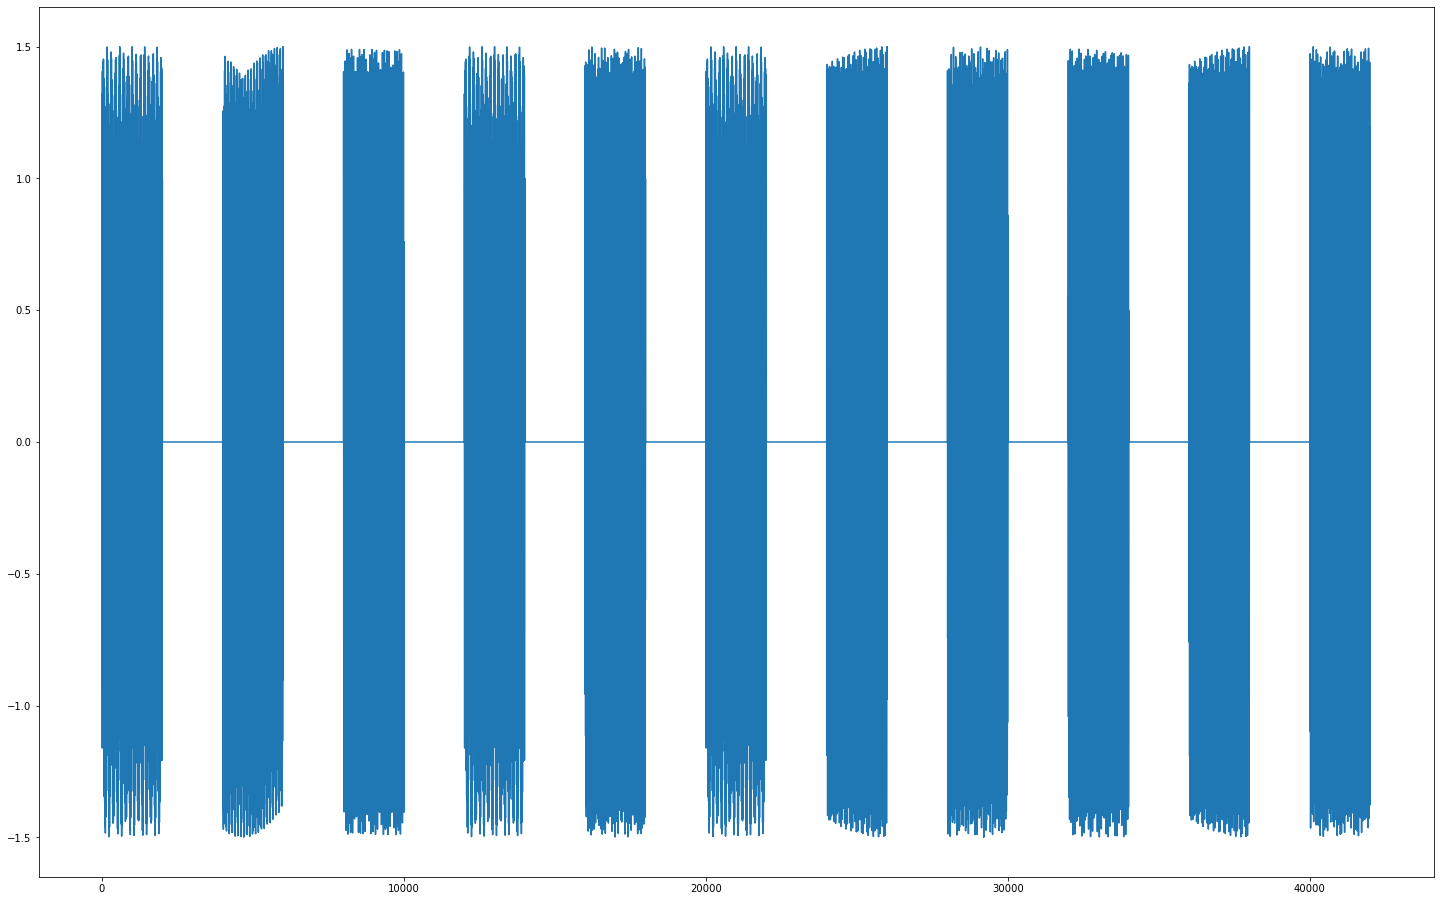

In [11]:
plt.figure(figsize = (25, 16))
plt.plot(signals)

[None]

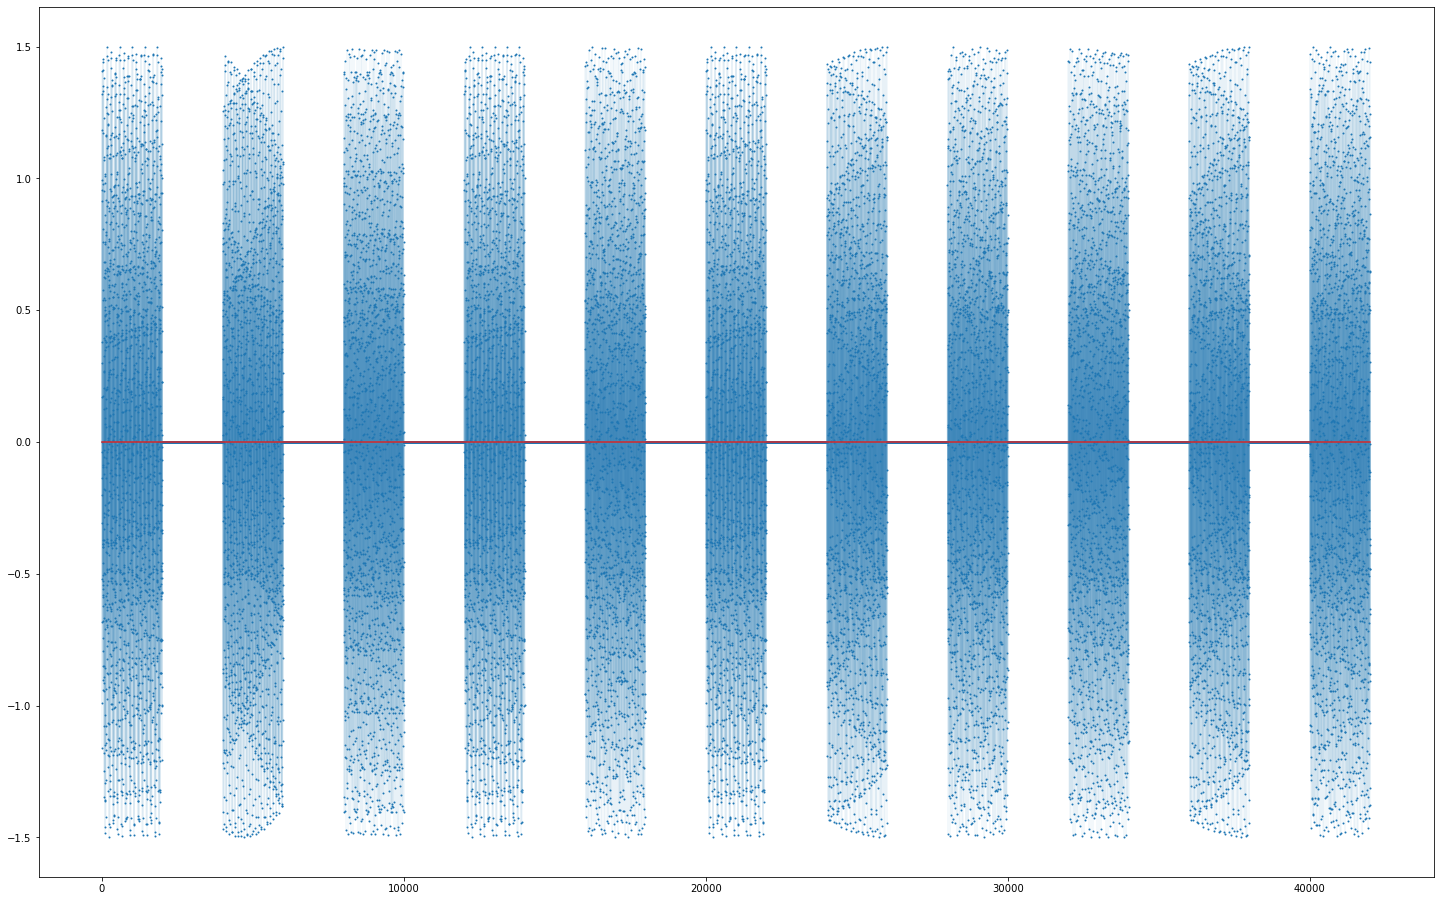

In [12]:
plt.figure(figsize = (25, 16))
markerline, stemlines, baseline = plt.stem(signals)
plt.setp(stemlines, 'linewidth', 0.1)
plt.setp(markerline,  markersize = 1)

In [13]:
import sounddevice as sd
fs = 22050
sd.play(signals, fs)

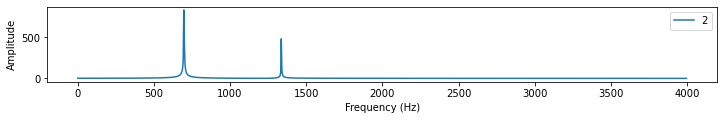

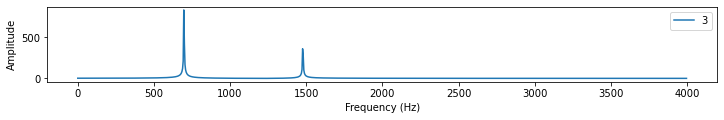

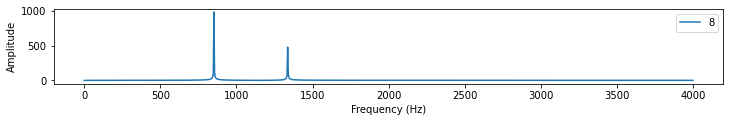

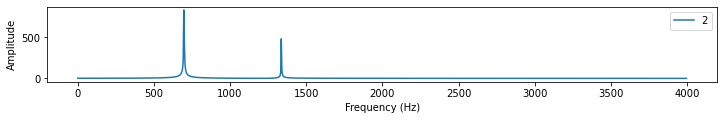

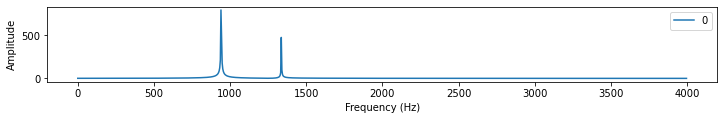

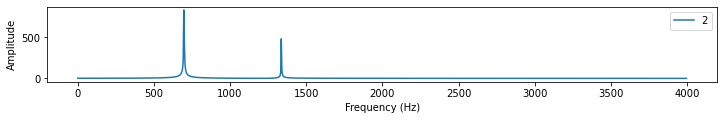

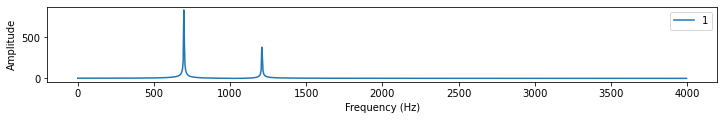

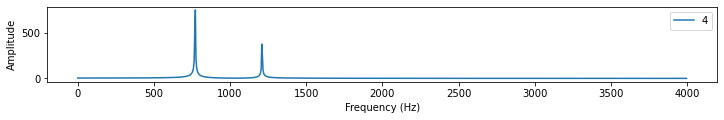

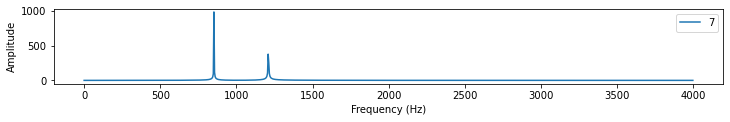

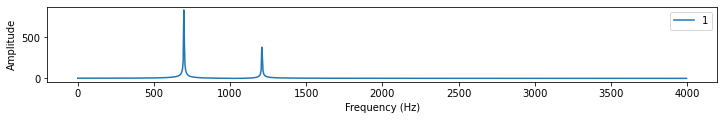

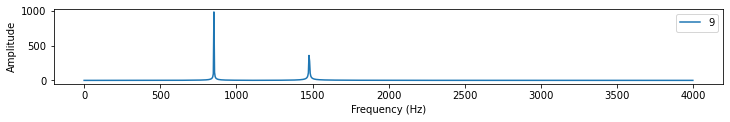

In [14]:
num = "23820214719"
count = 1
for i in range(0, 21, 2):
    subsignal = signals[i * N: (i + 1) * N]
    FFT = abs(fft(subsignal))
    freqs = fftpk.fftfreq(len(FFT), T)
    plt.figure(figsize =(12,18))
    plt.subplot(11, 1, count)
    plt.plot(freqs[range(len(FFT)//2)], FFT[range(len(FFT)//2)])                                                                  
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.legend(num[count - 1])
    count += 1

In [15]:
peak_amps = [697, 770, 852, 941, 1209, 1336, 1477]
number = []
print('Peaks')
for i in range(0, 21, 2):
    subsignal = signals[i * N: (i + 1) * N]
    FFT = abs(fft(subsignal))
    freqs = fftpk.fftfreq(len(FFT), T)
    f = scipy.signal.find_peaks(FFT[range(len(FFT)//2)])[0]
    peaks = freqs[f]
    p = []
    #olusan gurultuler kaynakli peaklerdeki ufak sapmalarin yol acacagi hatalari ortadan kaldirmak icin
    #%0.5 lik bir threshold belirledik ve +- bu threshold rangei icindekileri bizim peakimiz kabul ettik
    for peak in peaks:
        for freq in peak_amps:
            if peak * 0.995 < freq and peak * 1.005 > freq:
                p.append(freq)
    print(p)
    number.append(get_number_fromPeaks(p))
print('Number = ', number)

Peaks
[697, 1336]
[697, 1477]
[852, 1336]
[697, 1336]
[941, 1336]
[697, 1336]
[697, 1209]
[770, 1209]
[852, 1209]
[697, 1209]
[852, 1477]
Number =  ['2', '3', '8', '2', '0', '2', '1', '4', '7', '1', '9']
